Notebook to make the Macrophage EMD-based embeddings from Figure 1 and the DE Heatmap in Figure S1.

In [1]:
library(tidyverse)
library(Seurat)
library(patchwork)
library(ComplexHeatmap)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.1 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message in fun(libname, pkgname):
“rgeos: versions of GEOS runtime 3.11.1-CAPI-1.17.1
and GEOS at installation 3.10.3-CAPI-1.16.1differ”
Attaching SeuratObject

Attaching sp

Loading required package: grid

ComplexHeatmap version 2.12.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The 

In [ ]:
#Define input directories

    data_dir <- "../ZenodoRepo/"

# EMD-based condition embeddings

Integrated object with all macrophage cells was generated as shown in the Epithelial notebook within this folder.

The resulting object can be found in the *DATA REPO* and loaded as follows:

#Load object:

    emdPCA_INTmac <- readRDS(paste0(data_dir,"emdPCA_INTmac.rds"))
    emdPCA_INTmac@active.assay <- "RNA"
    emdPCA_INTmac

Compute EMD using cygnal as described in the Epithelial notebook.


Load EMD scores and plot DR

In [5]:
#Load EMD

    EMD_mac <- read_tsv("data/EMD_mac.txt") %>%
                select(-starts_with("median")) %>% 
                select(-starts_with("denominator")) %>% 
                spread(marker, EMD_no_norm_arc) %>% 
                column_to_rownames(., var = "file_origin")
    EMD_mac <- EMD_mac[,!apply(EMD_mac, MARGIN=2, function(x) max(x, na.rm = TRUE) == min(x, na.rm = TRUE))]
    EMD_mac

Rows: 43250 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): denominator, file_origin, marker
dbl (4): EMD_no_norm_arc, median_diff_no_norm_arc_compare_from_vs_to, median...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,0610005C13Rik,0610009B22Rik,0610009E02Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610038B21Rik,0610039K10Rik,0610040B10Rik,⋯,995_Gm17229,996_Myb,996_Mybbp1a,996_Mybl1,996_Mybl2,996_Mybpc1,996_Mybpc2,997_Sgk1,998_Gm26740,999_Hmgb1-ps8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
exportData_cocultAKMac_mac.txt,0.0000000000,0.02293101,0.003288567,0.05739497,0.05223924,0.3037194,0.01766535,0.009672982,0.0005620322,0.027705024,⋯,0.004884000,0.001700407,0.01360827,0.0012203510,0.0039005416,0.0000000000,0.0000000000,0.07713544,0.12188390,0.033251103
exportData_cocultAKMacFib_mac.txt,0.0004648210,0.07868303,0.006163194,0.08155482,0.10988145,0.6555682,0.01634661,0.002423773,0.0038991361,0.010909769,⋯,0.017937826,0.005550893,0.10182069,0.0012605509,0.0039053006,0.0000000000,0.0001716183,0.31183588,0.15556389,0.036927527
exportData_cocultAKPMac_REPLICATE_mac.txt,0.0003513035,0.03691670,0.008467672,0.02543777,0.02908174,0.1631930,0.07402834,0.003939050,0.0016267073,0.010494078,⋯,0.015825323,0.008234703,0.05317896,0.0025170652,0.0102376278,0.0004675975,0.0000000000,0.22055916,0.07465004,0.027568324
exportData_cocultAKPMacFib_mac.txt,0.0011028453,0.12567448,0.009341496,0.06479491,0.14435071,0.5990186,0.05550445,0.006000146,0.0022614158,0.014215383,⋯,0.007477316,0.002406885,0.06049834,0.0035925503,0.0074900924,0.0000000000,0.0008415411,0.24645069,0.14971114,0.025519198
exportData_cocultAMac_mac.txt,0.0000000000,0.04068921,0.005050653,0.03490339,0.03482030,0.1862537,0.02096390,0.001331542,0.0000000000,0.008534679,⋯,0.011783750,0.003631247,0.02038500,0.0008258679,0.0032485535,0.0000000000,0.0000000000,0.29876094,0.03865484,0.046462113
exportData_cocultAMacFib_mac.txt,0.0000000000,0.16605041,0.002922579,0.05273962,0.19664744,0.5169420,0.02902609,0.010587133,0.0026313906,0.017409036,⋯,0.005189652,0.001055663,0.06823026,0.0048304999,0.0046938083,0.0000000000,0.0000000000,0.11254629,0.06438753,0.017295860
exportData_cocultMacFib_mac.txt,0.0004739856,0.07213674,0.004079538,0.02472931,0.07777826,0.3351713,0.07519349,0.002789859,0.0018233407,0.016854810,⋯,0.019608106,0.003134093,0.06391149,0.0030407287,0.0005341671,0.0000000000,0.0000000000,0.07097339,0.05934994,0.066335484
exportData_cocultWTMac_mac.txt,0.0050118719,0.04373241,0.005879834,0.01656682,0.03078677,0.2692788,0.06285511,0.004141074,0.0000000000,0.011796511,⋯,0.011580345,0.005195035,0.05867610,0.0009070847,0.0019075395,0.0000000000,0.0000000000,0.29915978,0.03247463,0.060897040
exportData_cocultWTMacFib_mac.txt,0.0000000000,0.11220622,0.004133917,0.05782008,0.12384708,0.4443157,0.04583375,0.007142064,0.0004782399,0.016260516,⋯,0.003840554,0.005923925,0.07214271,0.0032818866,0.0022452068,0.0000000000,0.0000000000,0.13380149,0.07459351,0.009668399


<!-- #Add here a snippet of code to refactor/rewrite conditions as shown in /SampleDF_scRNAseq -->

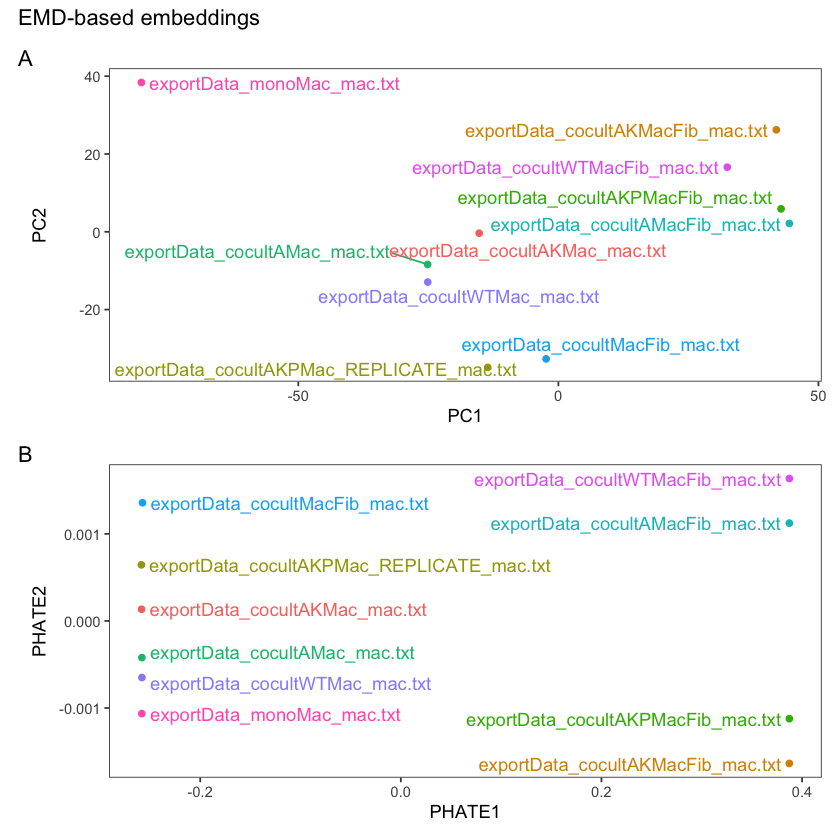

In [10]:
#Plot DR embeddings

    pcaEMD_mac <- prcomp(EMD_mac, center=TRUE, scale=TRUE)
    pcaEMD_mac <- as.data.frame(pcaEMD_mac$x) %>% select(PC1,PC2) %>% rownames_to_column(var="Condition")
    pca_plot <- ggplot(pcaEMD_mac, aes(x=PC1, y=PC2, colour=Condition)) +
        geom_point() +
        ggrepel::geom_text_repel(aes(label=Condition)) +
        guides(colour="none") +
        egg::theme_article()

    phateEMD_mac <- phateR::phate(EMD_mac,
        knn = 2, decay = 40, t = "auto",
        knn.dist.method = "euclidean",
        mds.solver = "sgd", mds.method = "metric", mds.dist.method = "euclidean",
        n.jobs = 1, seed = 12)
    phateEMD_mac <- as.data.frame(phateEMD_mac$embedding) %>% rownames_to_column(var="Condition")
    phate_plot <- ggplot(phateEMD_mac, aes(x=PHATE1, y=PHATE2, colour=Condition)) +
        geom_point() +
        ggrepel::geom_text_repel(aes(label=Condition)) +
        guides(colour="none") +
        egg::theme_article()

    pca_plot + phate_plot + 
    plot_layout(ncol=1, nrow = 2) +
    plot_annotation(title="EMD-based embeddings",
        tag_levels = "A")

# DE of ALL macrophage cells

Most signigicant difference here is that the QC for macrophages needs to be adapted to their sparser transcriptomes when compared to epithelia and fibroblast cells.

#Load data from Run 1

    dlist_OrgCocultWT <- readRDS(paste0(data_dir,"jan21_crctme_WT.rds"))
    dlist_OrgCocultA <- readRDS(paste0(data_dir,"jan21_crctme_A.rds"))
    dlist_OrgCocultAK <- readRDS(paste0(data_dir,"jan21_crctme_AK.rds"))
    dlist_OrgCocultAKP <- readRDS(paste0(data_dir,"jan21_crctme_AKP.rds"))
    dlist_MacFib <- readRDS(paste0(data_dir,"jan21_tmecontrols.rds"))

    dlist_r1INTmac <- c(
        dlist_OrgCocultWT, dlist_OrgCocultA, dlist_OrgCocultAK, dlist_OrgCocultAKP,
        dlist_MacFib
    )
    rm(dlist_OrgCocultWT, dlist_OrgCocultA, dlist_OrgCocultAK, dlist_OrgCocultAKP,
        dlist_MacFib)

    dlist_INTmac <- c()
    for (i in 1:length(dlist_r1INTmac)) {
        if (grepl("Mac", dlist_r1INTmac[[i]]@project.name, fixed = TRUE)) {
            dlist_INTmac <- append(dlist_INTmac, dlist_r1INTmac[[i]])
        }
    }
    for (i in 1:length(dlist_INTmac)) {
        names(dlist_INTmac)[i] <- dlist_INTmac[[i]]@project.name
        #Store the cluster annotations found in the active.ident slot of the Run1 datasets into the metadata
        dlist_INTmac[[i]]@meta.data$clusters <- dlist_INTmac[[i]]@active.ident
        dlist_INTmac[[i]]@active.assay <- "RNA"
    }
    rm(dlist_r1INTmac)

#View names of objects and the names of the clusters

    for (i in 1:length(dlist_INTmac)) {
        p1 <- DimPlot(dlist_INTmac[[i]], reduction = "pca", group.by = "clusters") +
            egg::theme_article()
        p2 <- FeaturePlot(dlist_INTmac[[i]], reduction = "pca",
            features = c("Epcam", "Pdgfra","Ptprc"), combine = FALSE)
        print(p1+p2+
            plot_layout(ncol=2, nrow = 2)+
            plot_annotation(title=names(dlist_INTmac)[i],
                tag_levels = "A")
        )
    }

    dlist_INTmac

#Select those starting with f

    for (i in 1:length(dlist_INTmac)) {
        dlist_INTmac[[i]] <- subset(dlist_INTmac[[i]], idents = levels(
            dlist_INTmac[[i]]@meta.data$clusters)[startsWith(levels(dlist_INTmac[[i]]@meta.data$clusters),
            "m")]
        )
    }
    dlist_INTmac

QC goes here, we have positive selection for macrophage genes and negative selection for epithelial and fibroblasts genes

#QC

    for (i in 1:length(dlist_INTmac)) {
    dlist_INTmac[[i]] <- subset(dlist_INTmac[[i]],
                                subset = mito_content<2.8 &
                                        nFeature_RNA>600 &       
                                            nFeature_RNA<6000
                                )
    # print(VlnPlot(dlist_INTmac[[i]], features = c("nFeature_RNA", "nCount_RNA",
    #                                         "mito_content"),
    #             ncol = 3, assay = "RNA", group.by = "seurat_clusters", stack = FALSE) &
    #     xlab(""))
    
    }

#Marker selection: Expression values were manually determined

    fib_markers <- c("Dcn", "Ptn")
    epi_markers <- c("Epcam")
    mac_markers <- c("Ptprc")
    
    filt_dlist_INTmac <- c()
    for (i in 1:length(dlist_INTmac)) {
        attempt <- subset(dlist_INTmac[[i]],
                                        Ptprc>0
                                        )
        try(    attempt <- subset(dlist_INTmac[[i]],
                                        Ptprc>0 & Epcam<0.2
                                        ))
        try(    attempt <- subset(dlist_INTmac[[i]], 
                                        Ptprc>0 & Ptn<0.2 & Dcn<0.2
                                        ))
        try(    attempt <- subset(dlist_INTmac[[i]],
                                        Ptprc>0 & Epcam<0.2 & Ptn<0.2 & Dcn<0.2
                                        ))
        filt_dlist_INTmac <- append(filt_dlist_INTmac, attempt)
    }
    for (i in 1:length(filt_dlist_INTmac)) {
        print(filt_dlist_INTmac[[i]]@project.name)
        print(dim(filt_dlist_INTmac[[i]]))
        # print(VlnPlot(filt_dlist_INTmac[[i]], 
        #                 features = c("nFeature_RNA", "nCount_RNA",
        #                             "mito_content"),
        #                 ncol = 3, assay = "RNA", group.by = "seurat_clusters", 
        #                 stack = FALSE) &
        #     xlab(""))
        # print(VlnPlot(filt_dlist_INTmac[[i]], 
        #             features = c(fib_markers, epi_markers, mac_markers),
        #             ncol = 3, assay = "RNA", group.by = "seurat_clusters", 
        #             stack = FALSE) &
        #     xlab(""))
    }
    dlist_INTmac <- filt_dlist_INTmac

Integrate object as shown in the fibroblast notebooks.
As we have filtered based on expression of positive and negative gene markers, first SCT normalisation will have to be reapplied as shown in the EXPLORATION NOTEBOOK before performing the rPCA integration with the parameters shown in the Fibroblast notebook.

Load integrated object and do all DE et al to generate the Heatmap

In [2]:
#Integrated object can be shared upon request

    DE_INTfib <- readRDS("../On Request/DE_INTfib.rds")
    DE_INTfib

An object of class Seurat 
44923 features across 11809 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 1 dimensional reduction calculated: pcaMAC

PC_ 1 
Positive:  Apoe, Selenop, C1qa, C1qb, C1qc, Ly6a, Ly6e, Saa3, Ifi27l2a, Ifitm2 
	   Pltp, Tmem176b, Tmem176a, Ctsc, Ifit2, Aif1, Ms4a6c, Maf, Igfbp4, Ifitm3 
	   Fcrls, Fcgrt, Grn, Clec4a3, Ifi44, Ms4a6b, Lgmn, Zfp36l1, Apobec3, Cfp 
Negative:  Prdx1, Hmox1, Cd36, Rnf128, S100a6, Ero1l, Sqstm1, Pgk1, Lpl, Lgals3 
	   Mt1, Slc7a11, Mif, S100a4, Gclm, Srxn1, Procr, Esd, Ddit3, Pkm 
	   Bst1, Mt2, Ifrd1, Slc16a3, Ldha, Hspa9, Tpi1, Mmp12, Txnrd1, Basp1 
PC_ 2 
Positive:  Saa3, Cybb, Fpr2, Hp, Ly6c2, Clec4e, Mmp8, Thbs1, F13a1, Sod2 
	   Gda, Vcan, Plac8, Prdx5, Bst1, S100a8, Gpr141, Marcksl1, Fpr1, C3 
	   Slc16a3, Acod1, Ccr2, Marco, Ifitm6, Sell, Lcn2, Fbxl5, Lyz2, Chil3 
Negative:  Spp1, Fabp5, Lgals3, Ctsb, Gpnmb, Lpl, Lgmn, Ctsd, Cd5l, Gas6 
	   Cd63, Fabp4, Apoe, Selenop, Timp2, Il7r, Lat2, Serpinb6a, Psap, Tceal9 
	   Pmp22, Pld3, Vat1, Creg1, Anpep, Trem2, Abcg1, Grn, Cstb, Tfrc 
PC_ 3 
Positive:  Lpl, Actb, Ckb, Siglece, Ccr2, Cd72, Cd74, Ms4a4c, Ifi27l2a, Tmsb4x 
	   Ighm

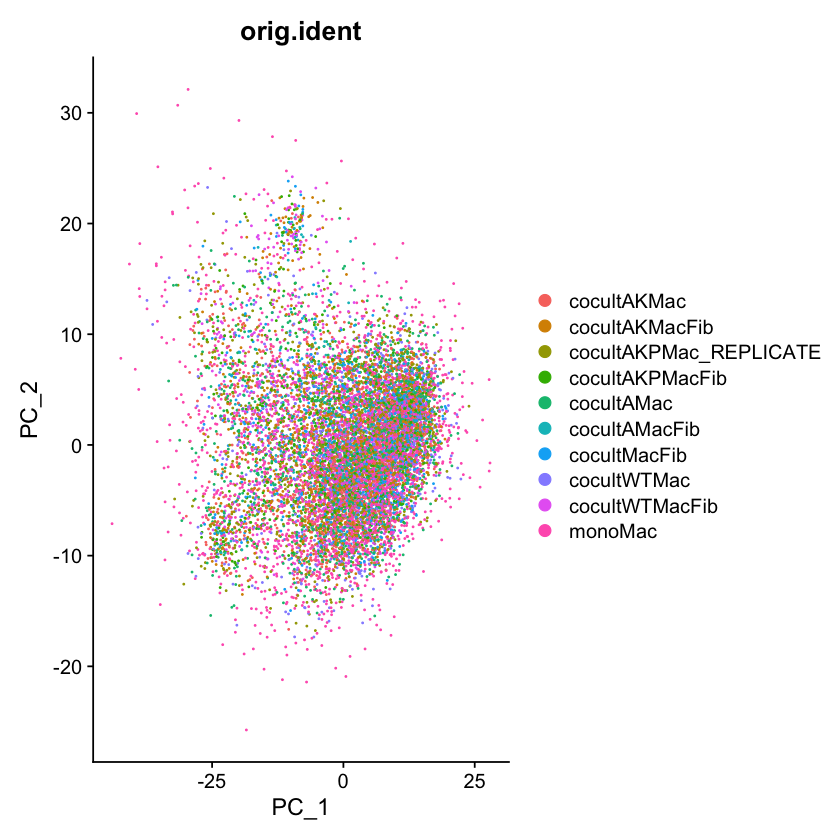

Centering and scaling data matrix



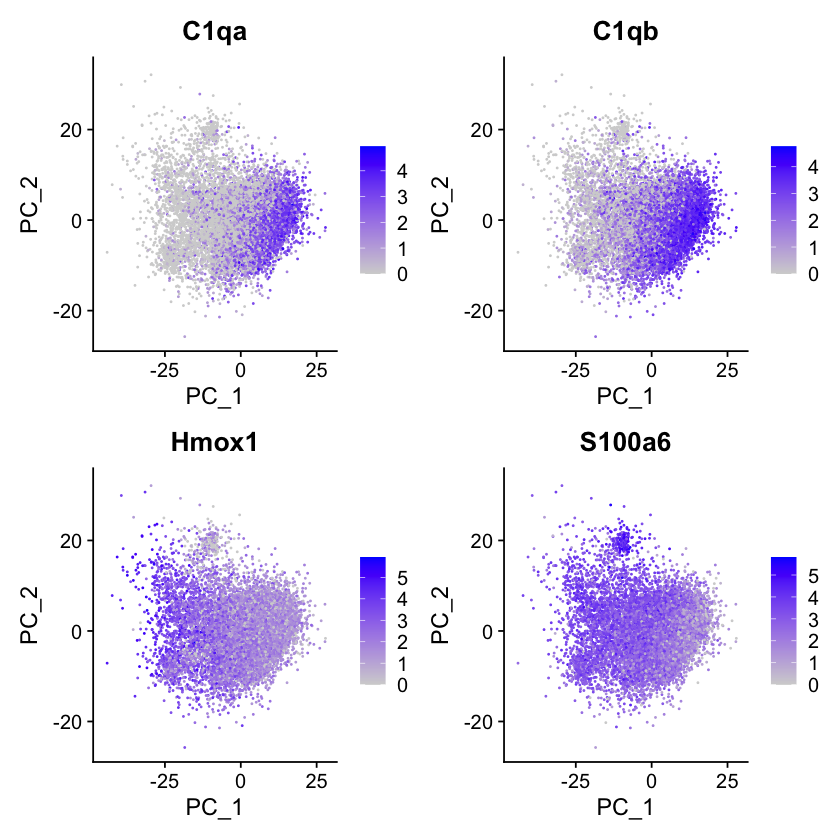

In [18]:
DE_INTfib <- RunPCA(DE_INTfib, assay="integrated", reduction.name="pcaMAC")
DimPlot(DE_INTfib, reduction = "pcaMAC", group.by = "orig.ident", shuffle = TRUE)

DE_INTfib@active.assay <- "RNA"
FeaturePlot(DE_INTfib, features = c("C1qa","C1qb", "Hmox1", "S100a6"))
DE_INTfib@active.assay <- "integrated"

#Popoulate scale.data slot on  RNA assay from the normalised values in @data
DE_INTfib <- ScaleData(DE_INTfib, features=rownames(DE_INTfib@assays$SCT), assay="RNA")

## Differential Expression

Compute diffrentially expressed genes between the different datasets containing fibroblasts.

We will use the non-integrated features (RNA assay) so we should not be masking any possible batch effects.

In [3]:
#Compute DE genes of each dataset with FindAllmarkers

    DE_INTfib <- SetIdent(DE_INTfib, value="orig.ident")
    gDE_INTmac_orig <- FindAllMarkers(
                        DE_INTfib, assay = "RNA",
                        min.pct = 0.1, only.pos = FALSE, test.use = "wilcox", 
                        random.seed = 12)
    write_csv(gDE_INTmac_orig,"data/gDE_INTmac_orig.csv")
    gDE_INTmac_orig_n6 <- gDE_INTmac_orig %>% group_by(cluster) %>% slice_max(n=6, order_by = c(abs(avg_log2FC)))
    gene_list <- unique(gDE_INTmac_orig_n6$gene)
    gene_list

Calculating cluster cocultWTMac

Calculating cluster cocultAMac

Calculating cluster cocultAKMac

Calculating cluster cocultAKPMac_REPLICATE

Calculating cluster monoMac

Calculating cluster cocultWTMacFib

Calculating cluster cocultAMacFib

Calculating cluster cocultAKMacFib

Calculating cluster cocultAKPMacFib

Calculating cluster cocultMacFib



[1] "S100a9"     "S100a8"     "Ifitm1"     "CT010467.1" "Pf4"       
 [6] "Krt8"       "Ccl8"       "Nupr1"      "Mrc1"       "Egr1"      
[11] "mt-Rnr1"    "Wfdc17"     "Ccl6"       "Gapdh"      "Lpl"       
[16] "Arg1"       "Cxcl2"      "Ccl7"       "Ubb"        "Mt1"       
[21] "Cd5l"       "Mir6236"    "Psap"       "Grn"        "F13a1"     
[26] "Dab2"       "Gm10076"    "Uba52"

<!-- #Order list of genes as in the Figure

    gene_list <- c(
        'S100a9','S100a8','Ifitm1','CT010467.1','Pf4','Krt8','Ccl8','Nupr1',
        'Mrc1','Egr1','mt-Rnr1','Wfdc17','Ccl6','Gapdh','Lpl','Arg1','Cxcl2',
        'Ccl7','Ubb','Mt1','Cd5l','Mir6236','Psap','Grn','F13a1','Dab2','Gm10076',
        'Uba52'
    ) -->

### Heatmap

In [21]:
mat_FigS1_INTmac <- DE_INTfib[["RNA"]]@scale.data[gene_list,] %>% 
                as.matrix()
mat_FigS1_INTmac

,AAAGAACAGGATACAT-1_1,AAAGGTATCTCTATGT-1_1,AAAGTCCTCGCTGTCT-1_1,AAATGGATCGCCGAGT-1_1,AACAAAGAGCTTTCCC-1_1,AACAACCAGTCGGCCT-1_1,AACAACCCAAAGAGTT-1_1,AACAAGATCCTGGTCT-1_1,AACACACAGACTGAGC-1_1,AACACACTCGGACGTC-1_1,⋯,TTTAGTCCAACGATCT-1_10,TTTATGCCAGTAGGAC-1_10,TTTCACACACGACTAT-1_10,TTTCACAGTAGGAGTC-1_10,TTTCAGTGTTGCATAC-1_10,TTTCGATAGTTGGAAT-1_10,TTTGATCCAATCCTAG-1_10,TTTGGAGTCACCATCC-1_10,TTTGTTGAGGTGCTAG-1_10,TTTGTTGCAGCGGATA-1_10
S100a9,-0.2249502,-0.22495021,-0.22495021,-0.22495021,-0.2249502,-0.22495021,-0.22495021,-0.22495021,-0.224950215,-0.22495021,⋯,-0.22495021,-0.22495021,-0.2249502,-0.224950215,-0.22495021,-0.2249502,-0.22495021,-0.224950215,-0.22495021,-0.22495021
S100a8,-0.3552605,-0.35526048,-0.35526048,-0.35526048,-0.3552605,-0.35526048,-0.35526048,-0.35526048,-0.355260482,0.17483946,⋯,-0.35526048,-0.35526048,-0.3552605,0.658491975,-0.35526048,0.6115779,-0.35526048,0.387386750,-0.35526048,-0.35526048
Ifitm1,-0.4429863,-0.44298630,-0.44298630,-0.44298630,-0.4429863,1.26417300,-0.44298630,-0.44298630,-0.442986300,-0.44298630,⋯,-0.44298630,-0.44298630,-0.4429863,0.610126992,-0.44298630,-0.4429863,-0.44298630,0.328495599,1.74326685,-0.44298630
CT010467.1,-0.2120492,-0.48482396,-0.47512730,-1.22176695,-1.0964164,-1.06097793,-0.77594976,-0.86740800,-1.104448652,-0.82078936,⋯,-0.48951016,-0.27449428,0.3618967,0.072308653,-0.07502898,-0.4185404,-0.20299731,0.443091274,-0.28385458,-1.07374151
Pf4,0.9225076,-0.05360418,0.97820364,0.40373569,1.1656516,-0.01227354,0.90985853,-0.02321343,-1.383436380,-0.64741844,⋯,1.01782540,-0.62647939,-0.2660584,-1.383436380,1.15185340,0.5696832,1.58110160,0.566014834,-0.87069951,0.77170324
Krt8,-0.5836574,-0.58365738,-0.58365738,-0.58365738,3.7216306,0.75642849,1.92668312,1.66853103,1.405201991,2.20198679,⋯,-0.58365738,-0.58365738,-0.5836574,-0.583657381,-0.58365738,-0.5836574,-0.58365738,-0.583657381,-0.58365738,-0.58365738
Ccl8,-0.3894146,-0.38941456,0.49821519,0.37119249,-0.3894146,-0.38941456,-0.38941456,-0.38941456,-0.389414556,-0.38941456,⋯,2.31426629,-0.38941456,-0.3894146,0.662614989,0.67635084,2.2139684,-0.38941456,-0.389414556,-0.38941456,-0.38941456
Nupr1,-0.8119837,-0.81198367,-0.81198367,-0.81198367,-0.8119837,-0.81198367,-0.81198367,0.13427504,0.003796301,0.83754674,⋯,-0.81198367,0.68471492,-0.8119837,-0.811983668,-0.81198367,-0.8119837,-0.81198367,-0.031786646,0.20182896,0.79589425
Mrc1,-0.9351905,0.95511273,0.99946626,-0.93519046,-0.9351905,-0.18699623,-0.93519046,-0.93519046,-0.935190457,-0.45841867,⋯,1.55132597,2.49933978,1.6948049,-0.935190457,2.70404506,1.1563465,1.32524126,0.422169236,0.71489338,1.75295219
Egr1,-0.7087950,1.85885347,1.49793102,1.28874476,0.5286920,-0.70879505,1.83555903,-0.70879505,1.364961694,0.71231310,⋯,-0.70879505,1.38342492,-0.7087950,0.331195091,-0.70879505,1.6768732,0.28610424,-0.708795049,-0.70879505,0.32154255


In [22]:
# Reorder datasets
DE_INTfib@meta.data$orig.ident <- factor(
    DE_INTfib@meta.data$orig.ident,
    levels= c(
        "monoMac", 
        "cocultWTMac", 
        "cocultAMac",
        "cocultAKMac",
        "cocultAKPMac_REPLICATE",
        "cocultMacFib",
        "cocultWTMacFib","cocultAMacFib",
        "cocultAKMacFib", "cocultAKPMacFib"
    )
)

#Define metadata colours
palette_epigenotype <- c(
                    "WT"="#669966", 
                    "A"="#666633",
                    "AK"="#336699", 
                    "AKP"="#3366CC"
                    )
palette_fibro <- c(
                    "0"="#FFFFFF",
                    "1"="#FF6666"
                    )

# Define metadata for the annotations at the top of the heatmap:
mdEPIgeno <- DE_INTfib@meta.data %>%
                transmute(EPIgeno = case_when(
                    as.character.factor(orig.ident) %in% c(
                        "cocultWTMac","cocultWTMacFib"
                    ) ~ "WT",
                    as.character.factor(orig.ident) %in% c(
                        "cocultAMac", "cocultAMacFib"
                    ) ~ "A",
                    as.character.factor(orig.ident) %in% c(
                        "cocultAKMac", "cocultAKMacFib"
                    ) ~ "AK",
                    as.character.factor(orig.ident) %in% c(
                        "cocultAKPMac_REPLICATE", "cocultAKPMacFib"
                    ) ~ "AKP",
                    #TRUE ~ as.character.factor(orig.ident)
                ))
mdFIB <- DE_INTfib@meta.data %>%
                transmute(FIB = case_when(
                    as.character.factor(orig.ident) %in% c(
                        "cocultMacFib",
                        "cocultWTMacFib","cocultAMacFib",
                        "cocultAKMacFib", "cocultAKPMacFib"
                    ) ~ "1",
                    TRUE ~ "0"
                ))
DE_INTfib <- AddMetaData(DE_INTfib, metadata = c(mdEPIgeno, mdFIB))

htmp_anno <- HeatmapAnnotation(
                EPIgeno = DE_INTfib@meta.data$EPIgeno,
                FIB = DE_INTfib@meta.data$FIB,
                col=list(
                    EPIgeno = palette_epigenotype,
                    FIB = palette_fibro
                ),
                na_col = "#FFFFFF"
)
htmp_anno

A HeatmapAnnotation object with 2 annotations
  name: heatmap_annotation_0 
  position: column 
  items: 11809 
  width: 1npc 
  height: 10.3514598035146mm 
  this object is subsettable
  17.2390666666667mm extension on the right 

    name annotation_type color_mapping height
 EPIgeno discrete vector  user-defined    5mm
     FIB discrete vector  user-defined    5mm

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



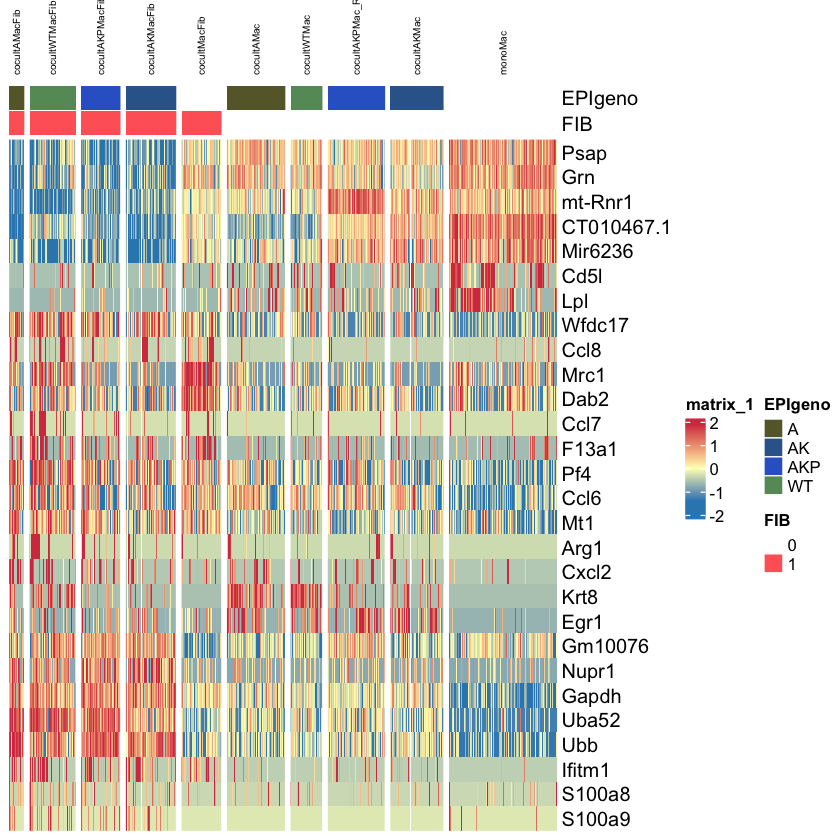

In [23]:
pHtmp_MACconDE <- Heatmap(mat_FigS1_INTmac,
        column_split = DE_INTfib@meta.data$orig.ident,
        cluster_columns = TRUE, show_column_dend = FALSE, cluster_column_slices = TRUE,
        cluster_rows = TRUE, cluster_row_slices = TRUE, show_row_dend = FALSE,
        column_title_rot = 90, column_title_gp = gpar(fontsize=6),
        column_gap = unit(1.2, "mm"), show_column_names = FALSE,
        top_annotation = htmp_anno,
        use_raster = TRUE, raster_quality = 2,
        col=circlize::colorRamp2(
                c(round(quantile(mat_FigS1_INTmac, c(0.04,0.96))[1], digits = 1),
                0, 
                round(quantile(mat_FigS1_INTmac, c(0.04,0.96))[2], digits = 1)), 
                c("#3288BD", "#FEFEBD", "#D53E4F"))
        )

pHtmp_MACconDE